In [1]:
from utils import conv
from utils import NN as nn
from utils import dataprepare as dp
from utils import Feature_extract as fe

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# import os
# # Load images and filenames
# train_images, train_image_filenames = dp.load_images_from_folder_filenames('rev_patching/patch_image')

# # Extract feature maps from images
# feature_maps = [fe.extract(image) for image in train_images]

# # Save feature maps with the same filenames as the original images
# for i, (feature_map, image_filename) in enumerate(zip(feature_maps, train_image_filenames)):
#     image_name = os.path.splitext(image_filename)[0]
#     pil_image = Image.fromarray(feature_map)
#     pil_image.save(f'rev_patching/feature_extract_image/{image_name}.png', format='PNG')

In [3]:
# Load images and ground truth labels
images_path = 'patching_fix/patch_image'
feature_images_path = 'patching_fix/extract_ori'
ground_truths_path = 'patching_fix/patch_ground'

images_load = dp.load_images_from_folder(images_path)
feature_images_load = dp.load_images_from_folder(feature_images_path)
ground_truths = dp.load_ground_truth_from_folder(ground_truths_path)

In [4]:
feature_images_train = feature_images_load[:math.ceil(len(feature_images_load)*0.8)] 
image_label_train = ground_truths[:math.ceil(len(ground_truths)*0.8)]

image_test = images_load[math.ceil(len(images_load)*0.8):]
image_label_test = ground_truths[math.ceil(len(ground_truths)*0.8):]

In [5]:
len(feature_images_train)

2021

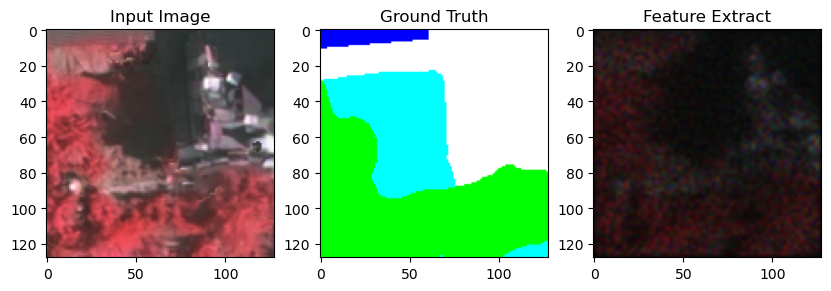

In [6]:
indeks = 1597
# Plot the images
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(images_load[indeks])
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truths[indeks])
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(feature_images_load[indeks])
plt.title('Feature Extract')

plt.show()

In [7]:
# Prepare data
X, y = dp.prepare_data(feature_images_train, image_label_train)

In [8]:
len(X)

3

In [9]:
# Normalize the features
X_normalized = X / 255.0

In [10]:
X_normalized.shape

(3, 33112064)

In [11]:
# Initialize the neural network
input_size = X_normalized.shape[0]
hidden_size = 2  # hidden neuron
output_size = 2  # 2 classes: vegetation and non-vegetation
learning_rate = 0.001
num_epochs = 20
toleransi_error = 0.1

# Initialize the neural network with adjusted hidden size
model = nn.NeuralNetwork(input_size, hidden_size, output_size)

# Check the shape of weights_hidden_output
print(model.weights_hidden_output.shape)


(2, 2)


In [66]:
images_load[0][0][0]

array([40, 46, 48], dtype=uint8)

In [64]:
feature_images_load[0][0][0:3].T[0]

array([2, 4, 5], dtype=uint8)

In [50]:
X[0][0:3]

array([2, 4, 5], dtype=uint8)

In [21]:
X_normalized[0]

array([0.00784314, 0.01568627, 0.01960784, ..., 0.03529412, 0.02352941,
       0.01568627])

In [12]:
# Inisialisasi awal bobot bias before train
print(model.weights_hidden_output)
print(model.bias_hidden_output)
print(model.weights_input_hidden)
print(model.bias_input_hidden)

[[-1.         -1.        ]
 [ 1.         -0.38454317]]
[[0. 0.]]
[[-0.30106512 -0.06256393]
 [ 0.37582692  0.37377939]
 [-1.         -0.62055979]]
[[0. 0.]]


In [69]:
# Training loop with batching
batch_size = 128
num_batches = X_normalized.shape[1] // batch_size
losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X_batch = X_normalized[:, start_idx:end_idx].T
        y_batch = y[:, start_idx:end_idx].T
        
        # Forward pass
        output = model.forward(X_batch)
        
        # Compute loss
        loss = nn.binary_cross_entropy(y_batch, output)
        epoch_loss += loss
        
        
        # Compute accuracy
        predicted_labels = np.argmax(output, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        correct_predictions += np.sum(predicted_labels == true_labels)
        total_predictions += len(true_labels)
        
        # Backpropagation
        model.backward(X_batch, y_batch, learning_rate)
    
    # Average loss for the epoch
    epoch_loss /= num_batches
    losses.append(epoch_loss)
    
    # Accuracy for the epoch
    # accuracy = correct_predictions / total_predictions
    accuracy = 1 - epoch_loss
    accuracies.append(accuracy)
    
    # Print loss
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
    
    # Early stopping
    if epoch_loss < toleransi_error:
        print("Training berhenti karena error sudah kurang dari 0.1")
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
        break

Epoch 1, Loss: 0.2690122874302404, Accuracy: 0.7309877125697596
Epoch 2, Loss: 0.2667375547116827, Accuracy: 0.7332624452883173
Epoch 3, Loss: 0.26666707120740357, Accuracy: 0.7333329287925965
Epoch 4, Loss: 0.2659407378310067, Accuracy: 0.7340592621689933
Epoch 5, Loss: 0.26410754481296644, Accuracy: 0.7358924551870336
Epoch 6, Loss: 0.2625241757329746, Accuracy: 0.7374758242670254
Epoch 7, Loss: 0.26158111008981655, Accuracy: 0.7384188899101835
Epoch 8, Loss: 0.26115201051608994, Accuracy: 0.7388479894839101
Epoch 9, Loss: 0.26100435448291187, Accuracy: 0.7389956455170881
Epoch 10, Loss: 0.2608724461480238, Accuracy: 0.7391275538519761
Epoch 11, Loss: 0.2608465584213863, Accuracy: 0.7391534415786136
Epoch 12, Loss: 0.2608116140444177, Accuracy: 0.7391883859555823
Epoch 13, Loss: 0.2607917260332028, Accuracy: 0.7392082739667972
Epoch 14, Loss: 0.260791285431249, Accuracy: 0.7392087145687509
Epoch 15, Loss: 0.260794085759323, Accuracy: 0.739205914240677
Epoch 16, Loss: 0.26084176841209

In [75]:
print('Bobot dan bias after train')
print('Bobot hidden-output:')
print(model.weights_hidden_output)
print('Bias hidden-output:')
print(model.bias_hidden_output)
print('Bobot input-hidden:')
print(model.weights_input_hidden)
print('Bias input-hidden:')
print(model.bias_input_hidden)

Bobot dan bias after train
Bobot hidden-output:
[[-0.78190079  0.78190079]
 [ 4.00247311 -4.00247311]]
Bias hidden-output:
[[ 1.02049408 -0.02049408]]
Bobot input-hidden:
[[ 46.3323245  -13.18520221]
 [-60.97568134  -6.13730188]
 [-38.26890401  -3.07821027]]
Bias input-hidden:
[[ 1.06348102 -2.97554939]]


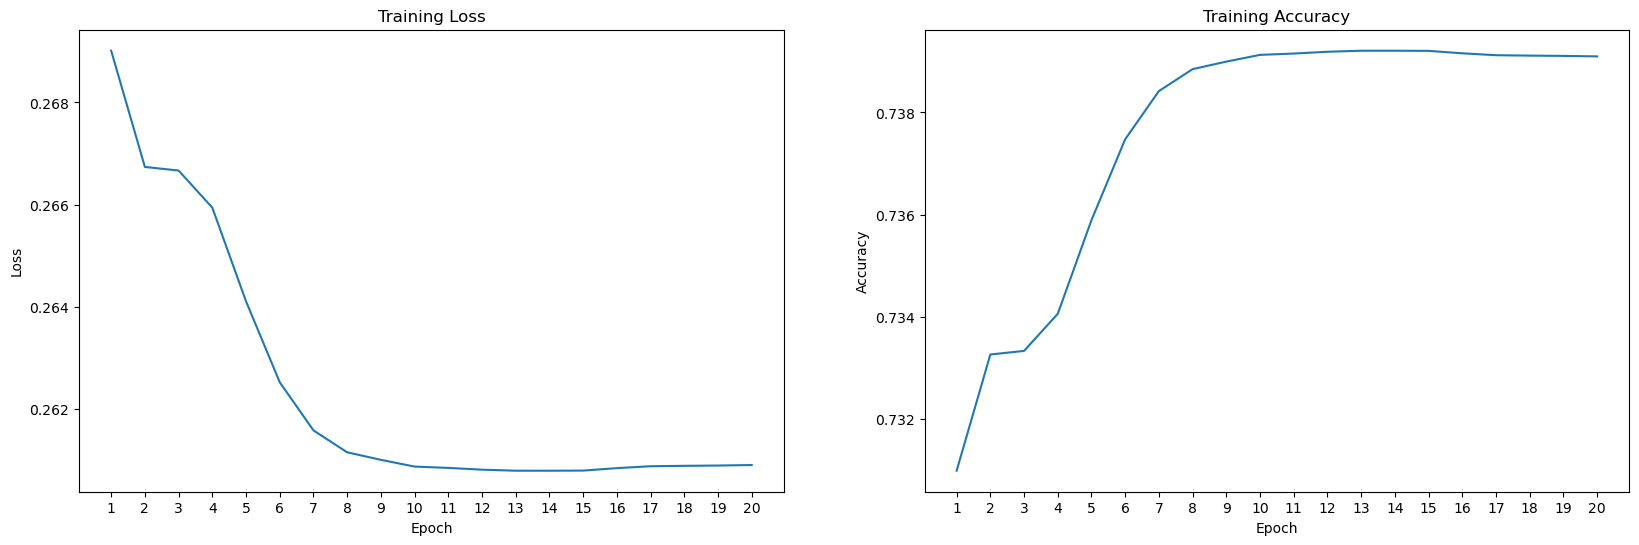

In [71]:
# Plot loss and accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses)  # Menyesuaikan sumbu x
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(losses) + 1))  # Menyesuaikan nilai pada sumbu x

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies)  # Menyesuaikan sumbu x
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Menyesuaikan nilai pada sumbu x

plt.show()

In [73]:
# Save weights to a file
def save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, filename):
    with open(filename, 'wb') as f:
        np.savez(f, weights_hidden_output=weights_hidden_output, bias_hidden_output=bias_hidden_output,
                 weights_input_hidden=weights_input_hidden, bias_input_hidden=bias_input_hidden)


weights_hidden_output = model.weights_hidden_output
bias_hidden_output = model.bias_hidden_output
weights_input_hidden = model.weights_input_hidden
bias_input_hidden = model.bias_input_hidden
save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, '1. Bobot_skenario_1.npz')

In [74]:
print(model.output)

[[ 1.02049412 -0.02049412]
 [ 1.02049413 -0.02049413]
 [ 1.02049413 -0.02049413]
 ...
 [ 1.02049408 -0.02049408]
 [ 1.02049408 -0.02049408]
 [ 1.02049408 -0.02049408]]


before argmax 
 [[ 1.02049412 -0.02049412]
 [ 1.02049413 -0.02049413]
 [ 1.02049413 -0.02049413]
 ...
 [ 1.02049408 -0.02049408]
 [ 1.02049408 -0.02049408]
 [ 1.02049408 -0.02049408]]
after argmax 
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


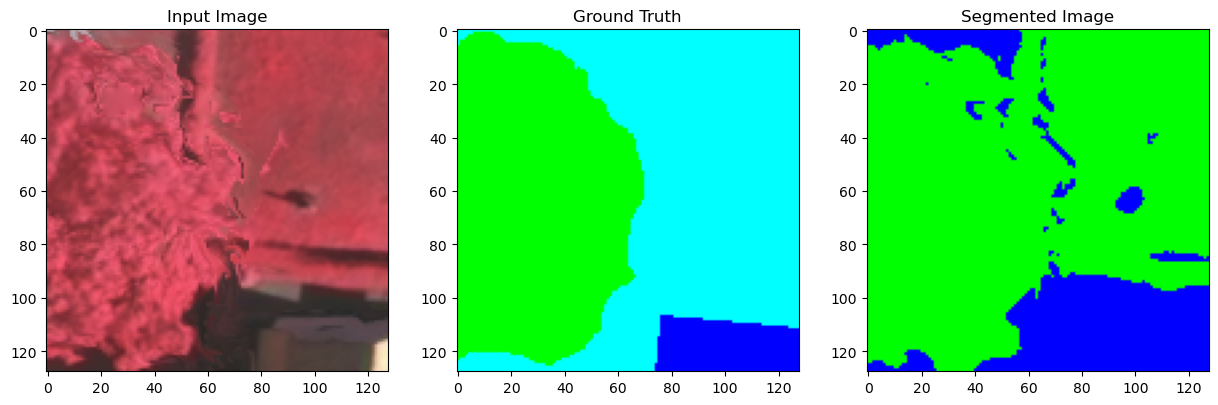

In [72]:
# Define colors for vegetation and non-vegetation
vegetation_color = [0, 255, 0]  # Green
non_vegetation_color = [0, 0, 255]  # Blue

# Visualize segmentation results for one image
indexing = 2
input_image = images_load[indexing]
ground_truth = ground_truths[indexing]
features_get = fe.extract(input_image)

# Preprocess the input image
input_image_reshaped = cv2.resize(input_image, (128, 128)) / 255.0
features = input_image_reshaped.reshape(-1, 3)  # Remove the transpose operation here

# Predict segmentation mask
predicted_mask = model.forward(features)
pred_before = predicted_mask
print('before argmax \n',pred_before)
predicted_mask = predicted_mask.argmax(axis=1).reshape(128, 128)
pred_after= predicted_mask
print('after argmax \n',pred_after)
# print(len(predicted_mask))
# Create segmented image
segmented_image = np.zeros((128, 128, 3), dtype=np.uint8)

# Assign colors based on predicted mask
segmented_image[predicted_mask == 0] = non_vegetation_color
segmented_image[predicted_mask == 1] = vegetation_color

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

In [24]:
print('nilai prediksi \n', pred_before[50:60])
print('hasil argmax \n', pred_after[2][50:60])

nilai prediksi 
 [[ 0.91309717  0.08292262]
 [ 0.9657361   0.03225555]
 [ 0.99289534  0.00696309]
 [ 1.01450834 -0.01145675]
 [ 1.01434747 -0.0074396 ]
 [ 1.00350878  0.00605556]
 [ 0.99560038  0.01536018]
 [ 0.99342313  0.01787501]
 [ 0.99394047  0.01728584]
 [ 0.99504067  0.01600845]]
hasil argmax 
 [0 0 0 0 0 0 0 0 0 0]


Indeks yang ada warna merah
> 2007
> 2011 - 2013

Keperluan BI indeks analisa : 6, 19, 2012, 3192

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

=-=-=--=-=

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(2, 2, 2)
plt.imshow(features_get)
plt.title('Feature Maps')

plt.subplot(2, 2, 3)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(2, 2, 4)
plt.imshow(segmented_image)
plt.title('Segmented Image')